https://vgpena.github.io/classifying-tweets-with-keras-and-tensorflow/

En el anterior enlace, tenéis un ejemplo sobre cómo, a partir de tweets con un label específico (un sentimiento, positivo o negativo): 

1. Genera un conjunto de entrenamiento. El conjunto de entrenamiento es formado a partir de tweets completos pasados a un array con un tamaño específico.
2. Ese array (X_train de tamaño N) tiene un label que representa el sentimiento (y_train)
3. Como todas las frases tienen un tamaño N, la entrada de la red neuronal será de tamaño N y la salida de la red será de tamaño 2 usando activación softmax(porque hay dos clases).

Se pide: 

- Realizar un clasificador de reviews para el dataset de IMDB de la carpeta data_exercise/

**Cuando usa la importación "keras.x", reemplázalo por "tensorflow.keras.x"**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow import keras
import tensorflow.keras.preprocessing.text as kpt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import model_from_json

In [2]:
training = pd.read_csv("data_exercise/IMDB Dataset.csv")
X_train = training["review"]
y_train = training["sentiment"]

In [4]:
X_train

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [3]:
y_train = y_train.apply(lambda x: 1 if x == "positive" else 0)
y_train = np.asarray(y_train)

In [12]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [5]:
max_words = 3000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [6]:
dictionary = tokenizer.word_index

with open('dictionary.json', 'w') as dictionary_file:
    json.dump(dictionary, dictionary_file)

In [8]:
dictionary

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'so': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'out': 41,
 'about': 42,
 'if': 43,
 "it's": 44,
 'has': 45,
 'there': 46,
 'some': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'my': 56,
 'even': 57,
 'would': 58,
 'she': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'see': 63,
 'story': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'me': 68,
 'well': 69,
 'were': 70,
 'than': 71,
 'much': 72,
 'we': 73,
 'bad': 74,
 'been': 75,
 'get': 76,
 'do': 77,
 'great': 78,
 'other': 79,
 'will': 80,
 'also': 81,
 'into': 82,
 'p

In [7]:
def convert_text_to_index_array(text):
    return [dictionary[word] for word in kpt.text_to_word_sequence(text)]

In [9]:
allWordIndices = []

for text in X_train:
    wordIndices = convert_text_to_index_array(text)
    allWordIndices.append(wordIndices)

In [10]:
allWordIndices

[[27,
  4,
  1,
  79,
  2102,
  45,
  1072,
  12,
  100,
  147,
  39,
  307,
  3184,
  398,
  474,
  26,
  3195,
  33,
  23,
  203,
  14,
  11,
  6,
  621,
  48,
  596,
  16,
  68,
  7,
  7,
  1,
  86,
  148,
  12,
  3241,
  68,
  42,
  3184,
  13,
  92,
  5398,
  2,
  15115,
  134,
  4,
  570,
  60,
  268,
  8,
  203,
  36,
  1,
  661,
  139,
  1740,
  68,
  11,
  6,
  21,
  3,
  119,
  15,
  1,
  7888,
  2333,
  38,
  11469,
  11,
  119,
  2595,
  54,
  5911,
  16,
  5510,
  5,
  1479,
  376,
  38,
  570,
  92,
  6,
  3804,
  8,
  1,
  360,
  356,
  4,
  1,
  661,
  7,
  7,
  9,
  6,
  433,
  3184,
  14,
  12,
  6,
  1,
  11648,
  358,
  5,
  1,
  15701,
  6813,
  2538,
  1064,
  56309,
  9,
  2711,
  1421,
  20,
  23546,
  538,
  32,
  4636,
  2468,
  4,
  1,
  1208,
  117,
  29,
  1,
  7017,
  25,
  2970,
  11964,
  2,
  391,
  56310,
  34,
  16740,
  6,
  21,
  299,
  20,
  1,
  4910,
  7364,
  538,
  6,
  344,
  5,
  106,
  25421,
  8161,
  42636,
  14813,
  5050,
  7889,
  2453,

In [11]:
allWordIndices = np.asarray(allWordIndices)

train_x = tokenizer.sequences_to_matrix(allWordIndices, mode='binary')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [14]:
train_x

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [13]:
train_y = keras.utils.to_categorical(y_train, 2)

In [15]:
train_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [18]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics= ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               1536512   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 1,668,354
Trainable params: 1,668,354
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(train_x, train_y,
                    batch_size=32,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1,
                    shuffle=True)

Epoch 1/5
1407/1407 [==============================] - 31s 19ms/step - loss: 0.3306 - accuracy: 0.8569 - val_loss: 0.2734 - val_accuracy: 0.8848
Epoch 2/5
1407/1407 [==============================] - 22s 15ms/step - loss: 0.2492 - accuracy: 0.8960 - val_loss: 0.2853 - val_accuracy: 0.8784
Epoch 3/5
1407/1407 [==============================] - 25s 18ms/step - loss: 0.1997 - accuracy: 0.9155 - val_loss: 0.2882 - val_accuracy: 0.8790
Epoch 4/5
1407/1407 [==============================] - 23s 16ms/step - loss: 0.1252 - accuracy: 0.9466 - val_loss: 0.3706 - val_accuracy: 0.8768
Epoch 5/5
1407/1407 [==============================] - 25s 18ms/step - loss: 0.0766 - accuracy: 0.9683 - val_loss: 0.4279 - val_accuracy: 0.8822


In [22]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')

In [23]:
def representa_accuracy_loss_rnn(history, epochs_range):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs_range)

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

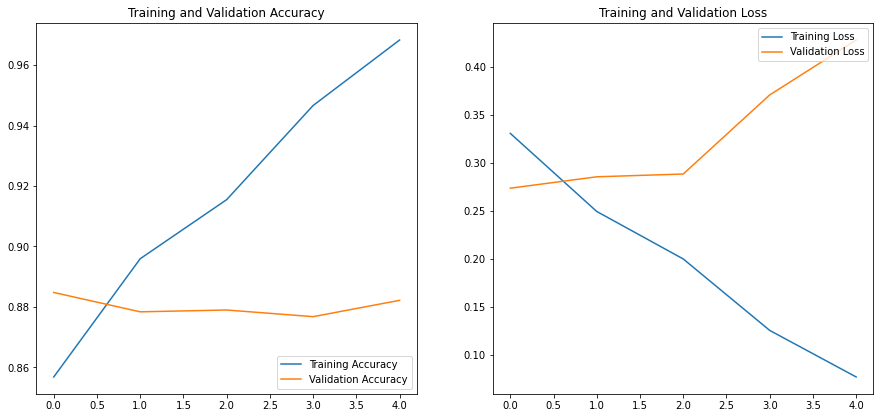

In [24]:
representa_accuracy_loss_rnn(history, 5)

El entrenamiento debería pararse en la segunda época. Vuelvo a entrenarlo con sólo dos épocas.

In [26]:
model2 = Sequential()
model2.add(Dense(512, input_shape=(max_words,), activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='sigmoid'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics= ['accuracy'])

history2 = model2.fit(train_x, train_y,
                    batch_size=32,
                    epochs=2,
                    verbose=1,
                    validation_split=0.1,
                    shuffle=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               1536512   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 514       
Total params: 1,668,354
Trainable params: 1,668,354
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1407/1407 [==============================] - 31s 19ms/step - loss: 0.3277 - accuracy: 0.8569 - val_l

In [27]:
model2_json = model2.to_json()
with open('model2.json', 'w') as json_file:
    json_file.write(model2_json)

model2.save_weights('model2.h5')

In [ ]:
tokenizer = Tokenizer(num_words=3000)
labels = ['negative', 'positive']

with open('dictionary.json', 'r') as dictionary_file:
    dictionary = json.load(dictionary_file)


def convert_text_to_index_array(text):
    words = kpt.text_to_word_sequence(text)
    wordIndices = []
    for word in words:
        if word in dictionary:
            wordIndices.append(dictionary[word])
        else:
            print("'%s' not in training corpus; ignoring." %(word))
    return wordIndices

json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model2.h5')


# while 1:
#     evalSentence = input('Input a sentence to be evaluated, or Enter to quit: ')

#     if len(evalSentence) == 0:
#         break

#     testArr = convert_text_to_index_array(evalSentence)
#     input = tokenizer.sequences_to_matrix([testArr], mode='binary')
#     pred = model.predict(input)
#     print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)] * 100))

In [37]:
def evaluate_text(text):
    testArr = convert_text_to_index_array(text)
    input = tokenizer.sequences_to_matrix([testArr], mode='binary')
    pred = model.predict(input)
    print("%s sentiment; %f%% confidence" % (labels[np.argmax(pred)], pred[0][np.argmax(pred)] * 100))

In [39]:
evaluate_text('That went better than expected')

negative sentiment; 69.548827% confidence


In [40]:
evaluate_text('That did not go as expected')

negative sentiment; 69.025016% confidence
